Full name: ***Moldir Koishybayeva*** <br>

<h2 align="center"> <font color=#4285F4><b><i>Mini Project </font></h4>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn import metrics
import math 
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('MP2_Data.csv') #sample_data -> UPLOAD MP2_Data.csv
print(df.columns) #features -> columns in this .csv file
print(df.shape)

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')
(107, 48)


In [ ]:
print(list(df.isna().sum()))
#no Null/Missing values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Sum of Stats for every week -> to have less columns**

In [ ]:
Week_Stat=[column for column in df.columns if 'Week' and 'Stat' in column]
i=0
def Week_Stat_Sum(i):
  Week_Stat_Sum=df[Week_Stat[i]]+df[Week_Stat[i+1]]+df[Week_Stat[i+2]]+df[Week_Stat[i+3]]
  return Week_Stat_Sum

def add(i):
  sum=0
  sum = Week_Stat_Sum(i)
  return sum

week={}
for j in range(1,10):  
  week[j]=add(i)
  i+=4

data=pd.DataFrame(week)
data.columns=['Week1_StatSum','Week2_StatSum','Week3_StatSum','Week4_StatSum','Week5_StatSum','Week6_StatSum','Week7_StatSum','Week8_StatSum','Week9_StatSum']

In [ ]:
df_new=df.drop(Week_Stat,axis=1)
df_new=df_new.join(data)

**<h4 align="center"> <font color=#0B6FD9> STEP 2** – ***Training & Test Dataset***</font><br>
*Added **Validation set** to evaluate best performing algorithm*

In [ ]:
x = df_new.drop(columns={'Grade','Week8_Total','ID'})
y=df_new['Week8_Total']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42)

In [ ]:
print(len(df_new))

107


In [ ]:
print(len(x_train),len(x_test),len(x_val))

63 22 22


**<h4 align="center"> <font color=#0B6FD9> Step 3 – Train the Model </font> <br> <font color=#0B6F7B> Random Forest Regressor**

In [ ]:
forest_reg=RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_predict_forest=forest_reg.predict(x_test)
print('Predicted values: \n',list(y_predict_forest))
print('Actual values: \n',list(y_test)) #actual data

Predicted values: 
 [85.88420000000005, 0.0, 71.16019999999995, 0.0, 82.72899999999998, 80.01759999999999, 75.43839999999996, 84.74699999999997, 0.0, 3.7723999999999966, 1.1499, 84.95680000000004, 80.51309999999997, 0.0, 4.001299999999995, 0.0, 91.59260000000002, 0.0, 46.28749999999997, 76.39039999999997, 96.6146, 83.21379999999998]
Actual values: 
 [90.24, 0.0, 67.68, 0.0, 82.77000000000002, 87.37, 71.96000000000002, 85.65, 0.0, 3.33, 0.0, 83.77, 82.97, 0.0, 5.0, 0.0, 94.27, 0.0, 29.2, 72.44, 96.24, 91.0]


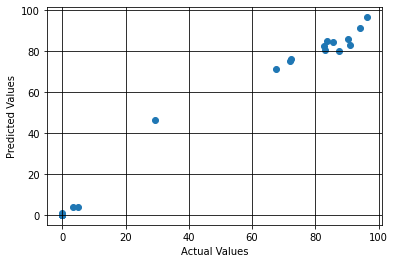

In [ ]:
plt.scatter(y_test,y_predict_forest)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(color='black')

**<h4 align="center"> <font color=#0B6F7B> Linear Regression**

In [ ]:
linreg=linear_model.LinearRegression()
model=linreg.fit(x_train, y_train) 
rfe=RFE(model,n_features_to_select=6)
rfe=rfe.fit(x_train,y_train)

In [ ]:
y_predict_linreg=rfe.predict(x_test)

**Multiple independent features** will effect when calculating a **dependent variable (y -> Week8_Total)** <br>
y=ax1+bx2+cx3+...+k 

In [ ]:
linreg.coef_ #=>a,b,c etc

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -4.23677108e-16,  2.35743189e-15, -1.28907954e-15,
       -1.69923757e-16, -3.77399684e-16, -1.00178872e-15, -9.77064545e-16,
        2.36644347e-15,  1.38777878e-16])

In [ ]:
linreg.intercept_ #k

-7.105427357601002e-15

In [ ]:
print('Predicted values: \n',list(y_predict_linreg))
print('Actual values: \n',list(y_test)) #actual data

Predicted values: 
 [89.60734265169657, 0.26698643334362515, 73.6353088832052, 0.26698643334362515, 84.35041454090319, 76.57044563964865, 70.3783158328709, 91.83331117555244, 0.26698643334362515, 3.0828768811467975, 0.26698643334362515, 88.9962053863587, 86.71696886439332, 0.26698643334362515, 4.495050168783823, 0.26698643334362515, 86.42146951552886, 0.26698643334362515, 67.98108107028582, 87.56047848250293, 93.37858047253883, 81.73069847827261]
Actual values: 
 [90.24, 0.0, 67.68, 0.0, 82.77000000000002, 87.37, 71.96000000000002, 85.65, 0.0, 3.33, 0.0, 83.77, 82.97, 0.0, 5.0, 0.0, 94.27, 0.0, 29.2, 72.44, 96.24, 91.0]


Text(0, 0.5, 'Predicted Values')

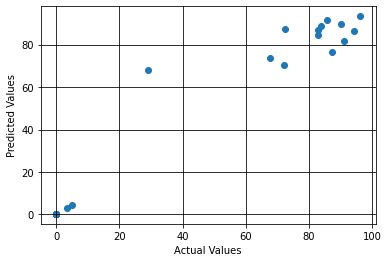

In [ ]:
plt.scatter(y_test,y_predict_linreg)
plt.grid(color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

**<h4 align="center"><font color=#0B6FD9> Evaluation of Models</font>**

In [ ]:
def evalu(y_test,y_predict,txt):
  print('Overall evaluation of '+txt+' Regression Model:\n')
  print('R2 score:',metrics.r2_score(y_test,y_predict))
  print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
  print('Root Mean Squared Error (RMSE):',metrics.mean_squared_error(y_test,y_predict, squared=False))
  print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))

In [ ]:
evalu(y_test,y_predict_forest,'Random Forest')

Overall evaluation of Random Forest Regression Model:

R2 score: 0.9868093860586369
Mean Squared Error: 21.979145094545377
Root Mean Squared Error (RMSE): 4.688192092325716
Mean Absolute Error: 2.623709090909088


In [ ]:
evalu(y_test,y_predict_linreg,'Linear')

Overall evaluation of Linear Regression Model:

R2 score: 0.9419988321818955
Mean Squared Error: 96.64569737194951
Root Mean Squared Error (RMSE): 9.830854356155903
Mean Absolute Error: 5.1003588089145415


**<h4 align="center"><font color=#0B6FD9> STEP 4 – Performance Evaluation**</font>

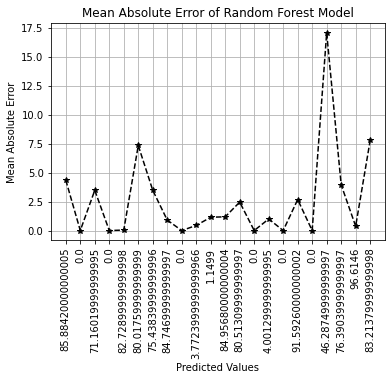

In [ ]:
abs_list=[]
y_test=y_test.values.tolist()
for i in range(len(y_test)):
  abs_err=math.fabs((y_test[i]-y_predict_forest[i]))
  abs_list.append(abs_err)
plt.title('Mean Absolute Error of Random Forest Model')
plt.plot(abs_list,color='k',marker='*',linestyle='--',linewidth=1.5,label='Mean Absolute Error')
plt.xticks(ticks=[i for i in range(len(abs_list))],labels=y_predict_forest,rotation='vertical')
plt.xlabel('Predicted Values')
plt.ylabel('Mean Absolute Error')
plt.style.use('seaborn-notebook')
plt.grid()

***MAE, MSE, RMSE metrics in one plot***

In [ ]:
def visual(y_test,y_predict,txt):  
  plt.title('Metrics for '+txt+' Regression')
  plt.style.use('seaborn-dark')
  MSE_list=[]
  for i in range(len(y_test)):
    MSE=(y_test[i]-y_predict[i])**2
    MSE_list.append(MSE)
  plt.plot(MSE_list,color='b',marker='o',label='Mean Squared Error')

  RMSE_list=[]
  for i in range(len(y_test)):
    RMSE=math.sqrt((y_test[i]-y_predict[i])**2)
    RMSE_list.append(RMSE)
  plt.plot(RMSE_list, color='r',marker='.',label='Root Mean Squared Error')
  plt.xticks(ticks=[i for i in range(len(RMSE_list))],labels=y_predict,rotation='vertical')
  plt.xlabel('Predicted Values')

  abs_list=[]
  for i in range(len(y_test)):
    abs_err=math.fabs((y_test[i]-y_predict[i]))
    abs_list.append(abs_err)
  plt.plot(abs_list,color='k',marker='*',linestyle='--',linewidth=1.5,label='Mean Absolute Error')

  plt.grid(True)
  plt.legend()
  plt.show()

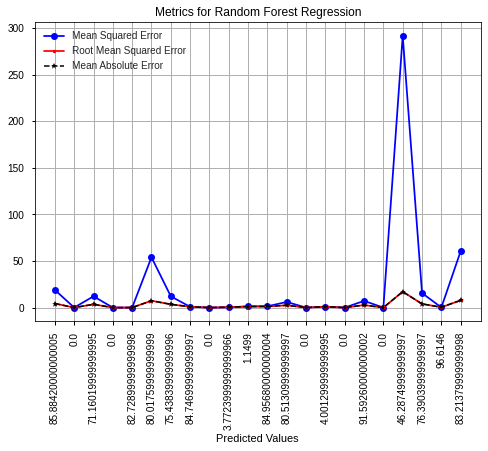

In [ ]:
visual(y_test,y_predict_forest,'Random Forest')

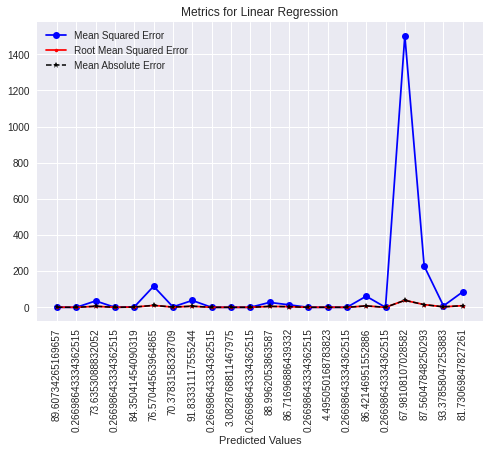

In [ ]:
visual(y_test,y_predict_linreg,'Linear')

**<h4 align="center"> <font color=#0B6FD9> STEP 5 – *Important features***</font>

In [ ]:
top_features=list(zip(x_train, forest_reg.feature_importances_)) #getting probabilities of feature influence
top_features.sort(key=lambda tuple: tuple[1],reverse=True)  # sorting list (consists of tuples) in asc order

In [ ]:
top_features

[('Week5_MP2', 0.47084098581343076),
 ('Week7_MP3', 0.3626648094966543),
 ('Week5_PR2', 0.07802399223326954),
 ('Week3_MP1', 0.03803960643498909),
 ('Week3_PR1', 0.02485197711345541),
 ('Week7_PR3', 0.00969230129118812),
 ('Week6_Quiz3', 0.0045491094417496915),
 ('Week4_Quiz2', 0.003062825764594337),
 ('Week3_StatSum', 0.0023606759119154832),
 ('Week6_StatSum', 0.0017248641503547703),
 ('Week2_Quiz1', 0.0014584095916586562),
 ('Week2_StatSum', 0.0007358455363893886),
 ('Week5_StatSum', 0.0006862610704477969),
 ('Week8_StatSum', 0.00034828062880719335),
 ('Week1_StatSum', 0.0002593195466385336),
 ('Week9_StatSum', 0.0002514535059378315),
 ('Week4_StatSum', 0.0002247351738045934),
 ('Week7_StatSum', 0.00022454729471444525)]

In [ ]:
top_features = dict(top_features)
prob=pd.DataFrame(top_features.values())
prob.sum()

0    1.0
dtype: float64

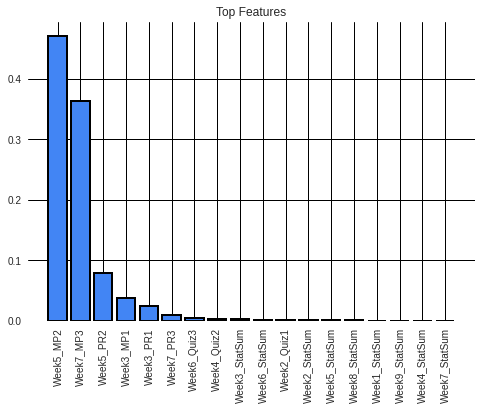

In [ ]:
plt.style.use('seaborn-notebook')
plt.bar(range(len(top_features)), list(top_features.values()),edgecolor='black',linewidth=2,color='#4285F4')
plt.xticks(range(len(top_features)),list(top_features.keys()),rotation='vertical')
plt.grid(color='black')
c=plt.gca()
c.set_facecolor('#FFFFFF')
c.set_title('Top Features')
plt.show()